In [ ]:
# Translating language
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/IP2_Project/cleaned_xl_file_en_fr.xlsx', engine='openpyxl')
main_df = pd.DataFrame()
display(df)

,Submission date,AppID,AppName,Review Language,Rating,Title,Review,Reply Date,Reply Delta,Developer Reply
0,2016-09-25,com.bmo.mobile,bmo_GooglePlay,en,2,Lacklustre and Underwhelming,Come on BMO.. get mobile deposit already. It's...,NaN,NaN,NaN
1,2016-09-22,com.bmo.mobile,bmo_GooglePlay,en,5,NaN,Compact and light on resources,NaN,NaN,NaN
2,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,1,Used to be great...,This app used to be amazing but once it did th...,NaN,NaN,NaN
3,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,4,Needs SMS & Cheque depositing,"It's a great app, especially now that it doesn...",NaN,NaN,NaN
4,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,3,NaN,Having problems opening this app now why?,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
107956,2016-09-24,358790776,td_AppStore,en,1,Doesn't work,"It kept showing me system error, can't log in ...",NaN,NaN,NaN
107957,2016-09-24,358790776,td_AppStore,en,1,Doesn't work,System error every time I try to log in. Can't...,NaN,NaN,NaN
107958,2016-09-24,358790776,td_AppStore,en,5,Great,App is good. Until TD touch comes out you can ...,NaN,NaN,NaN
107959,2016-09-24,358790776,td_AppStore,en,1,Crashes with e transfers,Brutal trying to do an etransfer to collect mo...,NaN,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install sentencepiece


In [ ]:
pip install transformers


In [ ]:
pip install torch

In [ ]:
# Creating batches from entire dataset
import numpy as np

# Define batch size
batch_size = 10000


# Split DataFrame into batches of 10,000 rows
batches = np.array_split(df, len(df) // batch_size + 1)

print(len(batches))


11


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
display(batches[0])

,Submission date,AppID,AppName,Review Language,Rating,Title,Review,Reply Date,Reply Delta,Developer Reply
0,2016-09-25,com.bmo.mobile,bmo_GooglePlay,en,2,Lacklustre and Underwhelming,Come on BMO.. get mobile deposit already. It's...,NaN,NaN,NaN
1,2016-09-22,com.bmo.mobile,bmo_GooglePlay,en,5,NaN,Compact and light on resources,NaN,NaN,NaN
2,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,1,Used to be great...,This app used to be amazing but once it did th...,NaN,NaN,NaN
3,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,4,Needs SMS & Cheque depositing,"It's a great app, especially now that it doesn...",NaN,NaN,NaN
4,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,3,NaN,Having problems opening this app now why?,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
9810,2018-02-15,com.bmo.mobile,bmo_GooglePlay,en,1,NaN,"I wanted to pay a bill, the new app doesn't le...",NaN,NaN,NaN
9811,2018-02-15,com.bmo.mobile,bmo_GooglePlay,en,1,NaN,Most recent update is horrible and much less e...,NaN,NaN,NaN
9812,2018-02-15,com.bmo.mobile,bmo_GooglePlay,en,1,NaN,New update makes it a much longer process to l...,2017-12-12T14:08:17+00:00,NaN,"Hi Daina, thanks for reaching out. We'll be re..."
9813,2018-02-15,com.bmo.mobile,bmo_GooglePlay,en,1,NaN,The new update is awful. Never works and const...,NaN,NaN,NaN


In [ ]:
main_df = pd.DataFrame()
main_df = pd.concat([main_df, batches[0]], axis=0)

In [ ]:
df_fr = batches[8][batches[8]['Review Language'] == 'fr']

display(df_fr)


,Submission date,AppID,AppName,Review Language,Rating,Title,Review,Reply Date,Reply Delta,Developer Reply
78542,2019-07-04,com.scotiabank.banking,scotia_GooglePlay,fr,1,NaN,Degeulasse as an app. I'm no longer able to pa...,2019-07-04T19:13:41+00:00,14:33:59,Bonjour Eric. Nous sommes dÃ©solÃ©s que vous Ã...
78550,2019-07-03,com.scotiabank.banking,scotia_GooglePlay,fr,1,NaN,Does not work in French,2019-07-03T14:03:18+00:00,01:29:33,Bonjour. Nous sommes dÃ©solÃ©s que vous Ã©prou...
78588,2019-06-28,com.scotiabank.banking,scotia_GooglePlay,fr,2,NaN,bug application on my cell I'm not able to con...,2019-07-02T16:10:12+00:00,3.882905,"Hi Karol-Ann, weâ€™re sorry to hear youâ€™re e..."
78608,2019-06-26,com.scotiabank.banking,scotia_GooglePlay,fr,3,NaN,I can't get through the security issues becaus...,2019-06-26T19:51:26+00:00,00:37:11,"Bonjour Jhonny, Nous sommes dÃ©solÃ©s que vous..."
78653,2019-06-20,com.scotiabank.banking,scotia_GooglePlay,fr,2,NaN,"I signed up for the alerts, but it doesn't see...",2019-06-21T13:07:16+00:00,15:22:02,"Bonjour FrÃ©dÃ©rik, Merci de nous faire part d..."
...,...,...,...,...,...,...,...,...,...,...
88271,2021-06-28,com.td,td_GooglePlay,fr,5,NaN,I'm very satisfied.,NaN,NaN,NaN
88273,2021-06-28,com.td,td_GooglePlay,fr,5,NaN,Very satisfied,NaN,NaN,NaN
88290,2021-06-28,com.td,td_GooglePlay,fr,1,NaN,His 2 hour I'm on the update.,NaN,NaN,NaN
88325,2021-06-28,com.td,td_GooglePlay,fr,1,NaN,It's a cane marde calisse.,NaN,NaN,NaN


In [ ]:
file_path = '/content/drive/MyDrive/IP2_Project/batch9_data.xlsx'
batches[8].to_excel(file_path, index=False, engine='openpyxl')


In [ ]:
import pandas as pd
from transformers import MarianMTModel, MarianTokenizer
import sentencepiece as spm
from tqdm import tqdm  # Import tqdm for progress tracking

model_name = 'Helsinki-NLP/opus-mt-fr-en'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

# Function to translate French reviews to English
def translate_to_english(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        print(text)
        return text

    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    translated_tokens = model.generate(**inputs)
    translated_text = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)
    return translated_text

# Use tqdm to track the progress of processing each row in batches
for index, row in tqdm(batches[0].iterrows(), total=len(batches[0]), desc="Processing batch 2"):
    if row['Review Language'] == 'fr':
        translated_review = translate_to_english(row['Review'])
        batches[0].at[index, 'Review'] = translated_review

# Concatenate the processed batch to the main DataFrame
main_df = pd.concat([main_df, batches[1]], axis=0)

print("Batch 1 processed successfully")


Processing batch 1:  13%|█▎        | 1231/9815 [02:57<36:48,  3.89it/s]

nan


Processing batch 1:  13%|█▎        | 1262/9815 [03:01<24:56,  5.72it/s]

nan


Processing batch 1:  13%|█▎        | 1283/9815 [03:09<42:09,  3.37it/s]

nan


Processing batch 1:  13%|█▎        | 1310/9815 [03:13<24:46,  5.72it/s]

nan


Processing batch 1:  13%|█▎        | 1322/9815 [03:17<33:37,  4.21it/s]

nan


Processing batch 1:  14%|█▍        | 1358/9815 [03:22<26:48,  5.26it/s]

nan


Processing batch 1: 100%|██████████| 9815/9815 [23:31<00:00,  6.95it/s]


NameError: name 'main_df' is not defined

In [ ]:
import pandas as pd
from transformers import MarianMTModel, MarianTokenizer
import sentencepiece as spm
from tqdm import tqdm  # Import tqdm for progress tracking

# Load the pre-trained MarianMT model for translating French to English
model_name = 'Helsinki-NLP/opus-mt-fr-en'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

# Function to translate French reviews to English
def translate_to_english(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        print(text)
        return text

    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    translated_tokens = model.generate(**inputs)
    translated_text = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)
    return translated_text

# Use tqdm to track the progress of processing each row in batches
for index, row in tqdm(batches[1].iterrows(), total=len(batches[1]), desc="Processing batch 2"):
    if row['Review Language'] == 'fr':
        translated_review = translate_to_english(row['Review'])
        batches[1].at[index, 'Review'] = translated_review

# Concatenate the processed batch to the main DataFrame
main_df = pd.concat([main_df, batches[1]], axis=0)

print("Batch 2 processed successfully")


KeyboardInterrupt: 

In [ ]:
display(batches[1])

,Submission date,AppID,AppName,Review Language,Rating,Title,Review,Reply Date,Reply Delta,Developer Reply
9815,2018-02-15,com.bmo.mobile,bmo_GooglePlay,en,2,NaN,Not working as well as the old one. I can't lo...,NaN,NaN,NaN
9816,2018-02-15,com.bmo.mobile,bmo_GooglePlay,en,1,NaN,Horrible! I can't log in half the time. This a...,NaN,NaN,NaN
9817,2018-02-15,com.bmo.mobile,bmo_GooglePlay,en,1,NaN,Hate this app. It's frustrating because the ap...,NaN,NaN,NaN
9818,2018-02-15,com.bmo.mobile,bmo_GooglePlay,en,1,NaN,New app update and layout are awful. I'll be u...,NaN,NaN,NaN
9819,2018-02-15,com.bmo.mobile,bmo_GooglePlay,en,3,NaN,I loved the old app i dont like this updated a...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
19625,2020-06-17,com.cibc.android.mobi,cibc_GooglePlay,en,1,NaN,CIBC is terrible,2020-06-17T19:14:38+00:00,07:12:14,Hi Michael. We'd like to learn more about your...
19626,2020-06-16,com.cibc.android.mobi,cibc_GooglePlay,en,4,NaN,Fingerprint reader says not. Supported on note...,NaN,NaN,NaN
19627,2020-06-15,com.cibc.android.mobi,cibc_GooglePlay,en,5,NaN,Works well for all my banking needs. I also li...,2020-06-17T19:12:10+00:00,2.146887,"Thanks for the 5 stars, Omar! Feel free to giv..."
19628,2020-06-15,com.cibc.android.mobi,cibc_GooglePlay,en,1,NaN,Worst bank ever to deal with,2020-06-17T19:16:45+00:00,2.291551,Hi David. We'd like to learn more about the is...


In [ ]:
import pandas as pd
from transformers import MarianMTModel, MarianTokenizer
import sentencepiece as spm
from tqdm import tqdm  # Import tqdm for progress tracking

# Load the pre-trained MarianMT model for translating French to English
model_name = 'Helsinki-NLP/opus-mt-fr-en'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

# Function to translate French reviews to English
def translate_to_english(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        print(text)
        return text

    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    translated_tokens = model.generate(**inputs)
    translated_text = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)
    return translated_text

# Use tqdm to track the progress of processing each row in batches
for index, row in tqdm(batches[2].iterrows(), total=len(batches[2]), desc="Processing batch 3"):
    if row['Review Language'] == 'fr':
        translated_review = translate_to_english(row['Review'])
        batches[2].at[index, 'Review'] = translated_review

# Concatenate the processed batch to the main DataFrame
# main_df = pd.concat([main_df, batches[1]], axis=0)

print("Batch 3 processed successfully")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Processing batch 3:  47%|████▋     | 4589/9815 [06:57<02:42, 32.25it/s]

nan


Processing batch 3:  47%|████▋     | 4640/9815 [06:59<02:24, 35.78it/s]

nan


Processing batch 3: 100%|██████████| 9815/9815 [19:14<00:00,  8.50it/s]

Batch 3 processed successfully


In [ ]:
import pandas as pd
from transformers import MarianMTModel, MarianTokenizer
import sentencepiece as spm
from tqdm import tqdm  # Import tqdm for progress tracking

# Load the pre-trained MarianMT model for translating French to English
model_name = 'Helsinki-NLP/opus-mt-fr-en'
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

# Function to translate French reviews to English
def translate_to_english(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        print(text)
        return text

    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    translated_tokens = model.generate(**inputs)
    translated_text = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)
    return translated_text

# Use tqdm to track the progress of processing each row in batches
for index, row in tqdm(batches[9].iterrows(), total=len(batches[9]), desc="Processing batch 10"):
    if row['Review Language'] == 'fr':
        translated_review = translate_to_english(row['Review'])
        batches[9].at[index, 'Review'] = translated_review

# Concatenate the processed batch to the main DataFrame
# main_df = pd.concat([main_df, batches[1]], axis=0)

print("Batch 10 processed successfully")


/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Processing batch 10: 100%|██████████| 9814/9814 [28:42<00:00,  5.70it/s]

Batch 10 processed successfully


# **After translation**

In [ ]:
# loading translated file
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/IP2_Project/Review_translated.xlsx', engine='openpyxl')
main_df = pd.DataFrame()
display(df)

,Submission date,AppID,AppName,Review Language,Rating,Title,Review,Reply Date,Reply Delta,Developer Reply
0,2016-09-25,com.bmo.mobile,bmo_GooglePlay,en,2,Lacklustre and Underwhelming,Come on BMO.. get mobile deposit already. It's...,NaN,NaN,NaN
1,2016-09-22,com.bmo.mobile,bmo_GooglePlay,en,5,NaN,Compact and light on resources,NaN,NaN,NaN
2,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,1,Used to be great...,This app used to be amazing but once it did th...,NaN,NaN,NaN
3,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,4,Needs SMS & Cheque depositing,"It's a great app, especially now that it doesn...",NaN,NaN,NaN
4,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,3,NaN,Having problems opening this app now why?,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
107956,2016-09-24,358790776,td_AppStore,en,1,Doesn't work,"It kept showing me system error, can't log in ...",NaN,NaN,NaN
107957,2016-09-24,358790776,td_AppStore,en,1,Doesn't work,System error every time I try to log in. Can't...,NaN,NaN,NaN
107958,2016-09-24,358790776,td_AppStore,en,5,Great,App is good. Until TD touch comes out you can ...,NaN,NaN,NaN
107959,2016-09-24,358790776,td_AppStore,en,1,Crashes with e transfers,Brutal trying to do an etransfer to collect mo...,NaN,NaN,NaN


In [ ]:
import pandas as pd
from tqdm import tqdm

# Initialize tqdm to track the progress
tqdm.pandas()

df['Review'] = df['Review'].progress_apply(lambda x: str(x).lower() if isinstance(x, str) else str(x).lower())

display(df)

100%|██████████| 107961/107961 [00:00<00:00, 167250.09it/s]


,Submission date,AppID,AppName,Review Language,Rating,Title,Review,Reply Date,Reply Delta,Developer Reply
0,2016-09-25,com.bmo.mobile,bmo_GooglePlay,en,2,Lacklustre and Underwhelming,come on bmo.. get mobile deposit already. it's...,NaN,NaN,NaN
1,2016-09-22,com.bmo.mobile,bmo_GooglePlay,en,5,NaN,compact and light on resources,NaN,NaN,NaN
2,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,1,Used to be great...,this app used to be amazing but once it did th...,NaN,NaN,NaN
3,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,4,Needs SMS & Cheque depositing,"it's a great app, especially now that it doesn...",NaN,NaN,NaN
4,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,3,NaN,having problems opening this app now why?,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
107956,2016-09-24,358790776,td_AppStore,en,1,Doesn't work,"it kept showing me system error, can't log in ...",NaN,NaN,NaN
107957,2016-09-24,358790776,td_AppStore,en,1,Doesn't work,system error every time i try to log in. can't...,NaN,NaN,NaN
107958,2016-09-24,358790776,td_AppStore,en,5,Great,app is good. until td touch comes out you can ...,NaN,NaN,NaN
107959,2016-09-24,358790776,td_AppStore,en,1,Crashes with e transfers,brutal trying to do an etransfer to collect mo...,NaN,NaN,NaN


In [ ]:
import pandas as pd
import string
from tqdm import tqdm

tqdm.pandas()

# Function to remove punctuation from a string
def remove_punctuation(text):
    if isinstance(text, str):
        return text.translate(str.maketrans('', '', string.punctuation))
    return text

df['Review'] = df['Review'].progress_apply(remove_punctuation)

display(df)

100%|██████████| 107961/107961 [00:01<00:00, 85170.81it/s]


,Submission date,AppID,AppName,Review Language,Rating,Title,Review,Reply Date,Reply Delta,Developer Reply
0,2016-09-25,com.bmo.mobile,bmo_GooglePlay,en,2,Lacklustre and Underwhelming,come on bmo get mobile deposit already its bee...,NaN,NaN,NaN
1,2016-09-22,com.bmo.mobile,bmo_GooglePlay,en,5,NaN,compact and light on resources,NaN,NaN,NaN
2,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,1,Used to be great...,this app used to be amazing but once it did th...,NaN,NaN,NaN
3,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,4,Needs SMS & Cheque depositing,its a great app especially now that it doesnt ...,NaN,NaN,NaN
4,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,3,NaN,having problems opening this app now why,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
107956,2016-09-24,358790776,td_AppStore,en,1,Doesn't work,it kept showing me system error cant log in ac...,NaN,NaN,NaN
107957,2016-09-24,358790776,td_AppStore,en,1,Doesn't work,system error every time i try to log in cant e...,NaN,NaN,NaN
107958,2016-09-24,358790776,td_AppStore,en,5,Great,app is good until td touch comes out you can a...,NaN,NaN,NaN
107959,2016-09-24,358790776,td_AppStore,en,1,Crashes with e transfers,brutal trying to do an etransfer to collect mo...,NaN,NaN,NaN


In [ ]:
import spacy
from tqdm import tqdm
import pandas as pd

nlp = spacy.load('en_core_web_sm')

tqdm.pandas()

def tokenize_with_spacy(text):
    if isinstance(text, str):
        doc = nlp(text)
        return [token.text for token in doc]
    return text

df['Tokens'] = df['Review'].progress_apply(tokenize_with_spacy)

display(df)


  0%|          | 272/107961 [00:08<53:21, 33.63it/s]


KeyboardInterrupt: 

In [ ]:
display(df['Tokens'][5869])

['i',
 'had',
 'to',
 'uninstall',
 'the',
 'app',
 'when',
 'transferring',
 'from',
 'chequing',
 'to',
 'another',
 'account',
 'it',
 'does',
 'nt',
 'allow',
 'me',
 'to',
 'scroll',
 'down',
 'to',
 'my',
 'other',
 'accounts',
 'i',
 'have',
 'tried',
 'clearing',
 'cache',
 'and',
 'uninstalling',
 'and',
 'reinstalling',
 'and',
 'it',
 'still',
 'had',
 'the',
 'same',
 'problem',
 'i',
 'also',
 'ca',
 'nt',
 'screen',
 'shot',
 'a',
 'confirmation',
 'reference',
 'number',
 'after',
 'making',
 'a',
 'payment',
 'i',
 'used',
 'to',
 'love',
 'this',
 'app',
 'but',
 'not',
 'anymore']

In [ ]:
# removing stop words
df['Tokens'] = df['Tokens'].progress_apply(lambda tokens: [token for token in tokens if not nlp.vocab[token].is_stop])


100%|██████████| 107961/107961 [00:07<00:00, 14819.09it/s]


In [ ]:
# performing lemmatization
df['Tokens'] = df['Tokens'].progress_apply(lambda tokens: [token.lemma_ for token in nlp(" ".join(tokens))])

display(df)

100%|██████████| 107961/107961 [17:31<00:00, 102.65it/s]


,Submission date,AppID,AppName,Review Language,Rating,Title,Review,Reply Date,Reply Delta,Developer Reply,Tokens
0,2016-09-25,com.bmo.mobile,bmo_GooglePlay,en,2,Lacklustre and Underwhelming,come on bmo get mobile deposit already its bee...,NaN,NaN,NaN,"[come, bmo, mobile, deposit, available, year, ..."
1,2016-09-22,com.bmo.mobile,bmo_GooglePlay,en,5,NaN,compact and light on resources,NaN,NaN,NaN,"[compact, light, resource]"
2,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,1,Used to be great...,this app used to be amazing but once it did th...,NaN,NaN,NaN,"[app, amazing, new, update, take, forever, act..."
3,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,4,Needs SMS & Cheque depositing,its a great app especially now that it doesnt ...,NaN,NaN,NaN,"[great, app, especially, not, 30, minute, send..."
4,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,3,NaN,having problems opening this app now why,NaN,NaN,NaN,"[have, problem, open, app]"
...,...,...,...,...,...,...,...,...,...,...,...
107956,2016-09-24,358790776,td_AppStore,en,1,Doesn't work,it kept showing me system error cant log in ac...,NaN,NaN,NaN,"[keep, show, system, error, not, log, account,..."
107957,2016-09-24,358790776,td_AppStore,en,1,Doesn't work,system error every time i try to log in cant e...,NaN,NaN,NaN,"[system, error, time, try, log, not, use, app]"
107958,2016-09-24,358790776,td_AppStore,en,5,Great,app is good until td touch comes out you can a...,NaN,NaN,NaN,"[app, good, td, touch, come, add, bank, card, ..."
107959,2016-09-24,358790776,td_AppStore,en,1,Crashes with e transfers,brutal trying to do an etransfer to collect mo...,NaN,NaN,NaN,"[brutal, try, etransfer, collect, money, , c..."


In [ ]:
#removing special chars and url

import re

def clean_token(token):
    token = re.sub(r'http\S+|www\S+|https\S+', '', token)
    token = re.sub(r'[^A-Za-z0-9\s]', '', token)
    return token

df['Tokens'] = df['Tokens'].progress_apply(lambda tokens: [clean_token(token) for token in tokens if clean_token(token)])


100%|██████████| 107961/107961 [00:11<00:00, 9805.83it/s] 


In [ ]:
pip install pyspellchecker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 29.9 MB/s eta 0:00:00


In [ ]:
# correcting misspelled words

from spellchecker import SpellChecker
from tqdm import tqdm

spell = SpellChecker()
tqdm.pandas()

def correct_spelling(tokens):
    corrected_tokens = []
    for token in tokens:
        if spell.unknown([token]):
            corrected_token = spell.correction(token)
        else:
            corrected_token = token
        corrected_tokens.append(corrected_token)
    return corrected_tokens

df['Tokens'] = df['Tokens'].progress_apply(correct_spelling)


  3%|▎         | 3565/107961 [11:42<5:43:02,  5.07it/s]


KeyboardInterrupt: 

In [ ]:
# removing non-ascii characters

df['Tokens'] = df['Tokens'].progress_apply(lambda tokens: [token.encode('ascii', 'ignore').decode('ascii') for token in tokens])


100%|██████████| 107961/107961 [00:02<00:00, 52549.23it/s]


In [ ]:
# normalize the text

import unicodedata

# Function to remove accents
def remove_accents(tokens):
    return [''.join(c for c in unicodedata.normalize('NFKD', token) if unicodedata.category(c) != 'Mn') for token in tokens]

df['Tokens'] = df['Tokens'].progress_apply(remove_accents)


100%|██████████| 107961/107961 [00:06<00:00, 16574.38it/s]


In [ ]:
file_path = '/content/drive/MyDrive/IP2_Project/data_processed_tokens.xlsx'
df.to_excel(file_path, index=False, engine='openpyxl')


# Adding label to the data

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/IP2_Project/data_processed_tokens.xlsx', engine='openpyxl')
main_df = pd.DataFrame()
display(df)

,Submission date,AppID,AppName,Review Language,Rating,Title,Review,Reply Date,Reply Delta,Developer Reply,Tokens
0,2016-09-25,com.bmo.mobile,bmo_GooglePlay,en,2,Lacklustre and Underwhelming,come on bmo get mobile deposit already its bee...,NaN,NaN,NaN,"['come', 'bmo', 'mobile', 'deposit', 'availabl..."
1,2016-09-22,com.bmo.mobile,bmo_GooglePlay,en,5,NaN,compact and light on resources,NaN,NaN,NaN,"['compact', 'light', 'resource']"
2,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,1,Used to be great...,this app used to be amazing but once it did th...,NaN,NaN,NaN,"['app', 'amazing', 'new', 'update', 'take', 'f..."
3,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,4,Needs SMS & Cheque depositing,its a great app especially now that it doesnt ...,NaN,NaN,NaN,"['great', 'app', 'especially', 'not', '30', 'm..."
4,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,3,NaN,having problems opening this app now why,NaN,NaN,NaN,"['have', 'problem', 'open', 'app']"
...,...,...,...,...,...,...,...,...,...,...,...
107956,2016-09-24,358790776,td_AppStore,en,1,Doesn't work,it kept showing me system error cant log in ac...,NaN,NaN,NaN,"['keep', 'show', 'system', 'error', 'not', 'lo..."
107957,2016-09-24,358790776,td_AppStore,en,1,Doesn't work,system error every time i try to log in cant e...,NaN,NaN,NaN,"['system', 'error', 'time', 'try', 'log', 'not..."
107958,2016-09-24,358790776,td_AppStore,en,5,Great,app is good until td touch comes out you can a...,NaN,NaN,NaN,"['app', 'good', 'td', 'touch', 'come', 'add', ..."
107959,2016-09-24,358790776,td_AppStore,en,1,Crashes with e transfers,brutal trying to do an etransfer to collect mo...,NaN,NaN,NaN,"['brutal', 'try', 'etransfer', 'collect', 'mon..."


In [ ]:
import pandas as pd
from transformers import AutoModelForSequenceClassification, pipeline
from tqdm import tqdm

model_name = "cardiffnlp/twitter-roberta-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(model_name)

sentiment_pipeline = pipeline("sentiment-analysis", model=model)

tqdm.pandas()

def analyze_sentiment(tokens):
    review_text = ' '.join(tokens)
    result = sentiment_pipeline(review_text)[0]
    label = result['label']
    if label == 'LABEL_2':
        return 'positive'
    elif label == 'LABEL_0':
        return 'negative'
    else:
        return 'neutral'

df['Review sentiment'] = df['Tokens'].progress_apply(analyze_sentiment)

print("process completed successfully");

file_path = '/content/drive/MyDrive/IP2_Project/Labeled_data.xlsx'
df.to_excel(file_path, index=False, engine='openpyxl')



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Exception: Impossible to guess which tokenizer to use. Please provide a PreTrainedTokenizer class or a path/identifier to a pretrained tokenizer.

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
from tqdm import tqdm

# Load the pre-trained RoBERTa model for sentiment analysis
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a sentiment analysis pipeline with truncation enabled
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, truncation=True)

# Function to analyze sentiment using the RoBERTa model
def analyze_sentiment(review_text):
    # Ensure truncation to handle long text inputs
    truncated_text = tokenizer(review_text, max_length=512, truncation=True, return_tensors="pt")
    result = sentiment_pipeline(tokenizer.decode(truncated_text['input_ids'][0], skip_special_tokens=True))[0]
    label = result['label']
    if label == 'LABEL_2':  # Positive sentiment
        return 'positive'
    elif label == 'LABEL_0':  # Negative sentiment
        return 'negative'
    else:
        return 'neutral'

# Enable progress tracking
tqdm.pandas()

# Assuming df is your existing dataframe with a 'Review' column
# Apply the sentiment analysis to the 'Review' column and create a new column 'Review sentiment'
df['Review sentiment'] = df['Review'].astype(str).progress_apply(analyze_sentiment)

print("Process completed successfully")
file_path = '/content/drive/MyDrive/IP2_Project/labeled_data.xlsx'
df.to_excel(file_path, index=False, engine='openpyxl')

display(df)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

100%|██████████| 107961/107961 [4:29:11<00:00,  6.68it/s]


Process completed successfully


,Submission date,AppID,AppName,Review Language,Rating,Title,Review,Reply Date,Reply Delta,Developer Reply,Tokens,Review sentiment
0,2016-09-25,com.bmo.mobile,bmo_GooglePlay,en,2,Lacklustre and Underwhelming,come on bmo get mobile deposit already its bee...,NaN,NaN,NaN,"['come', 'bmo', 'mobile', 'deposit', 'availabl...",neutral
1,2016-09-22,com.bmo.mobile,bmo_GooglePlay,en,5,NaN,compact and light on resources,NaN,NaN,NaN,"['compact', 'light', 'resource']",neutral
2,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,1,Used to be great...,this app used to be amazing but once it did th...,NaN,NaN,NaN,"['app', 'amazing', 'new', 'update', 'take', 'f...",negative
3,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,4,Needs SMS & Cheque depositing,its a great app especially now that it doesnt ...,NaN,NaN,NaN,"['great', 'app', 'especially', 'not', '30', 'm...",positive
4,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,3,NaN,having problems opening this app now why,NaN,NaN,NaN,"['have', 'problem', 'open', 'app']",negative
...,...,...,...,...,...,...,...,...,...,...,...,...
107956,2016-09-24,358790776,td_AppStore,en,1,Doesn't work,it kept showing me system error cant log in ac...,NaN,NaN,NaN,"['keep', 'show', 'system', 'error', 'not', 'lo...",negative
107957,2016-09-24,358790776,td_AppStore,en,1,Doesn't work,system error every time i try to log in cant e...,NaN,NaN,NaN,"['system', 'error', 'time', 'try', 'log', 'not...",negative
107958,2016-09-24,358790776,td_AppStore,en,5,Great,app is good until td touch comes out you can a...,NaN,NaN,NaN,"['app', 'good', 'td', 'touch', 'come', 'add', ...",positive
107959,2016-09-24,358790776,td_AppStore,en,1,Crashes with e transfers,brutal trying to do an etransfer to collect mo...,NaN,NaN,NaN,"['brutal', 'try', 'etransfer', 'collect', 'mon...",negative


# After Labeling

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/IP2_Project/labeled_data.xlsx', engine='openpyxl')
main_df = pd.DataFrame()
display(df)

,Submission date,AppID,AppName,Review Language,Rating,Title,Review,Reply Date,Reply Delta,Developer Reply,Tokens,Review sentiment
0,2016-09-25,com.bmo.mobile,bmo_GooglePlay,en,2,Lacklustre and Underwhelming,come on bmo get mobile deposit already its bee...,NaN,NaN,NaN,"['come', 'bmo', 'mobile', 'deposit', 'availabl...",neutral
1,2016-09-22,com.bmo.mobile,bmo_GooglePlay,en,5,NaN,compact and light on resources,NaN,NaN,NaN,"['compact', 'light', 'resource']",neutral
2,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,1,Used to be great...,this app used to be amazing but once it did th...,NaN,NaN,NaN,"['app', 'amazing', 'new', 'update', 'take', 'f...",negative
3,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,4,Needs SMS & Cheque depositing,its a great app especially now that it doesnt ...,NaN,NaN,NaN,"['great', 'app', 'especially', 'not', '30', 'm...",positive
4,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,3,NaN,having problems opening this app now why,NaN,NaN,NaN,"['have', 'problem', 'open', 'app']",negative
...,...,...,...,...,...,...,...,...,...,...,...,...
107956,2016-09-24,358790776,td_AppStore,en,1,Doesn't work,it kept showing me system error cant log in ac...,NaN,NaN,NaN,"['keep', 'show', 'system', 'error', 'not', 'lo...",negative
107957,2016-09-24,358790776,td_AppStore,en,1,Doesn't work,system error every time i try to log in cant e...,NaN,NaN,NaN,"['system', 'error', 'time', 'try', 'log', 'not...",negative
107958,2016-09-24,358790776,td_AppStore,en,5,Great,app is good until td touch comes out you can a...,NaN,NaN,NaN,"['app', 'good', 'td', 'touch', 'come', 'add', ...",positive
107959,2016-09-24,358790776,td_AppStore,en,1,Crashes with e transfers,brutal trying to do an etransfer to collect mo...,NaN,NaN,NaN,"['brutal', 'try', 'etransfer', 'collect', 'mon...",negative


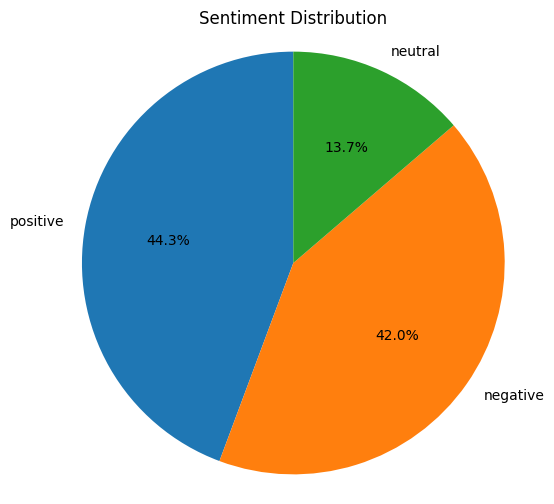

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' contains the sentiment column with 'positive', 'negative', and 'neutral' values
sentiment_counts = df['Review sentiment'].value_counts()

labels = sentiment_counts.index
sizes = sentiment_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Sentiment Distribution')
plt.show()


# Labelling Reddit dataset

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/IP2_Project/amit_cleaned_output_file_oct_xl.xlsx', engine='openpyxl')
main_df = pd.DataFrame()
display(df)

,Bank,Subreddit_name,Title,Bpvotes,Selftext,Comments Count,Created,Post URL,cleaned_text,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,CIBC,PersonalFinanceCanada,"I just had the worst experience with CIBC, wil...",1515,I helped my dad apply for a CIBC credit card 4...,337,2021-05-22 20:03:09,https://www.reddit.com/r/PersonalFinanceCanada...,helped dad apply cibc credit card week ago onl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CIBC,PersonalFinanceCanada,"CIBC called and asked ""How are you doing?""",227,I'm not sure if this is a fraud call or not. C...,130,2022-12-07 16:51:42,https://www.reddit.com/r/PersonalFinanceCanada...,sure fraud call cibc randomly called ask neede...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CIBC,PersonalFinanceCanada,Whatâ€™s so bad about CIBC?,0,It seems from the big 5 banks everyone has som...,13,2022-03-15 00:57:48,https://www.reddit.com/r/PersonalFinanceCanada...,seems big bank everyone something cibc bad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CIBC,PersonalFinanceCanada,Cibc just increased my LOC interest rate by 3....,1088,Iâ€™m carrying a fairly large balance on my LO...,728,2023-07-19 17:37:24,https://www.reddit.com/r/PersonalFinanceCanada...,carrying fairly large balance loc pay anytime ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CIBC,PersonalFinanceCanada,CIBC closing my account,750,Received a letter today from CIBC stating they...,493,2023-06-25 17:22:51,https://www.reddit.com/r/PersonalFinanceCanada...,received letter today cibc stating ending bank...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9679,BMO,Banking,[QUESTION] Checking for a Minor - legalities a...,1,"Hello,\n\nI have a few questions regarding ope...",5,2016-09-17 02:14:00,https://www.reddit.com/r/Banking/comments/535d...,hello question regarding opening checking acco...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9680,BMO,Banking,Can i use a Personal Account for Business Purp...,5,"Hello,\n\nRight now I pay $125 (BMO Biz Accoun...",6,2015-04-21 19:39:22,https://www.reddit.com/r/Banking/comments/33e1...,hello right pay bmo biz account monthly fee ov...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9681,BMO,Banking,Meaning of operational risk?,2,"Hello everyone, I am a grade 12 student who ha...",0,2017-09-05 18:00:16,https://www.reddit.com/r/Banking/comments/6y9q...,hello everyone grade student managed obtain co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9682,BMO,Banking,Banks with Cash retraction.,2,"Ok, my nephew has to do a project for his int...",4,2014-07-03 19:44:43,https://www.reddit.com/r/Banking/comments/29rm...,ok nephew project introduction anthropology so...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
from tqdm import tqdm

# Load the pre-trained RoBERTa model for sentiment analysis
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a sentiment analysis pipeline with truncation enabled
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, truncation=True)

# Function to analyze sentiment using the RoBERTa model
def analyze_sentiment(review_text):
    # Ensure truncation to handle long text inputs
    truncated_text = tokenizer(review_text, max_length=256, truncation=True, return_tensors="pt")
    result = sentiment_pipeline(tokenizer.decode(truncated_text['input_ids'][0], skip_special_tokens=True))[0]
    label = result['label']
    if label == 'LABEL_2':  # Positive sentiment
        return 'positive'
    elif label == 'LABEL_0':  # Negative sentiment
        return 'negative'
    else:
        return 'neutral'

# Enable progress tracking
tqdm.pandas()

# Assuming df is your existing dataframe with a 'Review' column
# Apply the sentiment analysis to the 'Review' column and create a new column 'Review sentiment'
df['Review sentiment'] = df['Selftext'].astype(str).progress_apply(analyze_sentiment)

print("Process completed successfully")
file_path = '/content/drive/MyDrive/IP2_Project/Reddit_labeled_data.xlsx'
df.to_excel(file_path, index=False, engine='openpyxl')

display(df)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
100%|██████████| 9684/9684 [1:47:54<00:00,  1.50it/s]


Process completed successfully


,Bank,Subreddit_name,Title,Bpvotes,Selftext,Comments Count,Created,Post URL,cleaned_text,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Review sentiment
0,CIBC,PersonalFinanceCanada,"I just had the worst experience with CIBC, wil...",1515,I helped my dad apply for a CIBC credit card 4...,337,2021-05-22 20:03:09,https://www.reddit.com/r/PersonalFinanceCanada...,helped dad apply cibc credit card week ago onl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
1,CIBC,PersonalFinanceCanada,"CIBC called and asked ""How are you doing?""",227,I'm not sure if this is a fraud call or not. C...,130,2022-12-07 16:51:42,https://www.reddit.com/r/PersonalFinanceCanada...,sure fraud call cibc randomly called ask neede...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
2,CIBC,PersonalFinanceCanada,Whatâ€™s so bad about CIBC?,0,It seems from the big 5 banks everyone has som...,13,2022-03-15 00:57:48,https://www.reddit.com/r/PersonalFinanceCanada...,seems big bank everyone something cibc bad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
3,CIBC,PersonalFinanceCanada,Cibc just increased my LOC interest rate by 3....,1088,Iâ€™m carrying a fairly large balance on my LO...,728,2023-07-19 17:37:24,https://www.reddit.com/r/PersonalFinanceCanada...,carrying fairly large balance loc pay anytime ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
4,CIBC,PersonalFinanceCanada,CIBC closing my account,750,Received a letter today from CIBC stating they...,493,2023-06-25 17:22:51,https://www.reddit.com/r/PersonalFinanceCanada...,received letter today cibc stating ending bank...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9679,BMO,Banking,[QUESTION] Checking for a Minor - legalities a...,1,"Hello,\n\nI have a few questions regarding ope...",5,2016-09-17 02:14:00,https://www.reddit.com/r/Banking/comments/535d...,hello question regarding opening checking acco...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
9680,BMO,Banking,Can i use a Personal Account for Business Purp...,5,"Hello,\n\nRight now I pay $125 (BMO Biz Accoun...",6,2015-04-21 19:39:22,https://www.reddit.com/r/Banking/comments/33e1...,hello right pay bmo biz account monthly fee ov...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
9681,BMO,Banking,Meaning of operational risk?,2,"Hello everyone, I am a grade 12 student who ha...",0,2017-09-05 18:00:16,https://www.reddit.com/r/Banking/comments/6y9q...,hello everyone grade student managed obtain co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive
9682,BMO,Banking,Banks with Cash retraction.,2,"Ok, my nephew has to do a project for his int...",4,2014-07-03 19:44:43,https://www.reddit.com/r/Banking/comments/29rm...,ok nephew project introduction anthropology so...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral


# Processing Reddit data

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/IP2_Project/Reddit_raw_data.xlsx', engine='openpyxl')
main_df = pd.DataFrame()
display(df)

,Bank,Subreddit_name,Title,Bpvotes,Selftext,Comments Count,Created,Post URL,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,CIBC,PersonalFinanceCanada,"I just had the worst experience with CIBC, wil...",1515,I helped my dad apply for a CIBC credit card 4...,337,2021-05-22 20:03:09,https://www.reddit.com/r/PersonalFinanceCanada...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CIBC,PersonalFinanceCanada,"CIBC called and asked ""How are you doing?""",227,I'm not sure if this is a fraud call or not. C...,130,2022-12-07 16:51:42,https://www.reddit.com/r/PersonalFinanceCanada...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CIBC,PersonalFinanceCanada,Whatâ€™s so bad about CIBC?,0,It seems from the big 5 banks everyone has som...,13,2022-03-15 00:57:48,https://www.reddit.com/r/PersonalFinanceCanada...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CIBC,PersonalFinanceCanada,Cibc just increased my LOC interest rate by 3....,1088,Iâ€™m carrying a fairly large balance on my LO...,728,2023-07-19 17:37:24,https://www.reddit.com/r/PersonalFinanceCanada...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CIBC,PersonalFinanceCanada,CIBC closing my account,750,Received a letter today from CIBC stating they...,493,2023-06-25 17:22:51,https://www.reddit.com/r/PersonalFinanceCanada...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9679,BMO,Banking,[QUESTION] Checking for a Minor - legalities a...,1,"Hello,\n\nI have a few questions regarding ope...",5,2016-09-17 02:14:00,https://www.reddit.com/r/Banking/comments/535d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9680,BMO,Banking,Can i use a Personal Account for Business Purp...,5,"Hello,\n\nRight now I pay $125 (BMO Biz Accoun...",6,2015-04-21 19:39:22,https://www.reddit.com/r/Banking/comments/33e1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9681,BMO,Banking,Meaning of operational risk?,2,"Hello everyone, I am a grade 12 student who ha...",0,2017-09-05 18:00:16,https://www.reddit.com/r/Banking/comments/6y9q...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9682,BMO,Banking,Banks with Cash retraction.,2,"Ok, my nephew has to do a project for his int...",4,2014-07-03 19:44:43,https://www.reddit.com/r/Banking/comments/29rm...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dropping unnecessary columns
df.drop('Post URL', axis=1, inplace=True)
display(df)


,Bank,Subreddit_name,Title,Bpvotes,Selftext,Comments Count,Created,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,CIBC,PersonalFinanceCanada,"I just had the worst experience with CIBC, wil...",1515,I helped my dad apply for a CIBC credit card 4...,337,2021-05-22 20:03:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CIBC,PersonalFinanceCanada,"CIBC called and asked ""How are you doing?""",227,I'm not sure if this is a fraud call or not. C...,130,2022-12-07 16:51:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CIBC,PersonalFinanceCanada,Whatâ€™s so bad about CIBC?,0,It seems from the big 5 banks everyone has som...,13,2022-03-15 00:57:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CIBC,PersonalFinanceCanada,Cibc just increased my LOC interest rate by 3....,1088,Iâ€™m carrying a fairly large balance on my LO...,728,2023-07-19 17:37:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CIBC,PersonalFinanceCanada,CIBC closing my account,750,Received a letter today from CIBC stating they...,493,2023-06-25 17:22:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9679,BMO,Banking,[QUESTION] Checking for a Minor - legalities a...,1,"Hello,\n\nI have a few questions regarding ope...",5,2016-09-17 02:14:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9680,BMO,Banking,Can i use a Personal Account for Business Purp...,5,"Hello,\n\nRight now I pay $125 (BMO Biz Accoun...",6,2015-04-21 19:39:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9681,BMO,Banking,Meaning of operational risk?,2,"Hello everyone, I am a grade 12 student who ha...",0,2017-09-05 18:00:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9682,BMO,Banking,Banks with Cash retraction.,2,"Ok, my nephew has to do a project for his int...",4,2014-07-03 19:44:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# prompt: get me the index and name of each column

for index, name in enumerate(df.columns):
  print(f"Index: {index}, Column Name: {name}")


Index: 0, Column Name: Bank
Index: 1, Column Name: Subreddit_name
Index: 2, Column Name: Title
Index: 3, Column Name: Bpvotes
Index: 4, Column Name: Selftext
Index: 5, Column Name: Comments Count
Index: 6, Column Name: Created
Index: 7, Column Name: Unnamed: 8
Index: 8, Column Name: Unnamed: 9
Index: 9, Column Name: Unnamed: 10
Index: 10, Column Name: Unnamed: 11
Index: 11, Column Name: Unnamed: 12
Index: 12, Column Name: Unnamed: 13
Index: 13, Column Name: Unnamed: 14
Index: 14, Column Name: Unnamed: 15
Index: 15, Column Name: Unnamed: 16


In [ ]:
# prompt: delete all columns from 7 to 15

df = df.drop(df.columns[7:16], axis=1)
display(df)


,Bank,Subreddit_name,Title,Bpvotes,Selftext,Comments Count,Created
0,CIBC,PersonalFinanceCanada,"I just had the worst experience with CIBC, wil...",1515,I helped my dad apply for a CIBC credit card 4...,337,2021-05-22 20:03:09
1,CIBC,PersonalFinanceCanada,"CIBC called and asked ""How are you doing?""",227,I'm not sure if this is a fraud call or not. C...,130,2022-12-07 16:51:42
2,CIBC,PersonalFinanceCanada,Whatâ€™s so bad about CIBC?,0,It seems from the big 5 banks everyone has som...,13,2022-03-15 00:57:48
3,CIBC,PersonalFinanceCanada,Cibc just increased my LOC interest rate by 3....,1088,Iâ€™m carrying a fairly large balance on my LO...,728,2023-07-19 17:37:24
4,CIBC,PersonalFinanceCanada,CIBC closing my account,750,Received a letter today from CIBC stating they...,493,2023-06-25 17:22:51
...,...,...,...,...,...,...,...
9679,BMO,Banking,[QUESTION] Checking for a Minor - legalities a...,1,"Hello,\n\nI have a few questions regarding ope...",5,2016-09-17 02:14:00
9680,BMO,Banking,Can i use a Personal Account for Business Purp...,5,"Hello,\n\nRight now I pay $125 (BMO Biz Accoun...",6,2015-04-21 19:39:22
9681,BMO,Banking,Meaning of operational risk?,2,"Hello everyone, I am a grade 12 student who ha...",0,2017-09-05 18:00:16
9682,BMO,Banking,Banks with Cash retraction.,2,"Ok, my nephew has to do a project for his int...",4,2014-07-03 19:44:43


In [ ]:

# Drop rows where 'selftext' or 'title' is null or blank
rows_before = len(df)
df.dropna(subset=['Selftext', 'Title'], inplace=True)
df = df[df['Selftext'].str.strip().astype(bool)]
df = df[df['Title'].str.strip().astype(bool)]
rows_after = len(df)
rows_affected = rows_before - rows_after

print(f"Number of rows affected: {rows_affected}")
display(df)


Number of rows affected: 420


,Bank,Subreddit_name,Title,Bpvotes,Selftext,Comments Count,Created
0,CIBC,PersonalFinanceCanada,"I just had the worst experience with CIBC, wil...",1515,I helped my dad apply for a CIBC credit card 4...,337,2021-05-22 20:03:09
1,CIBC,PersonalFinanceCanada,"CIBC called and asked ""How are you doing?""",227,I'm not sure if this is a fraud call or not. C...,130,2022-12-07 16:51:42
2,CIBC,PersonalFinanceCanada,Whatâ€™s so bad about CIBC?,0,It seems from the big 5 banks everyone has som...,13,2022-03-15 00:57:48
3,CIBC,PersonalFinanceCanada,Cibc just increased my LOC interest rate by 3....,1088,Iâ€™m carrying a fairly large balance on my LO...,728,2023-07-19 17:37:24
4,CIBC,PersonalFinanceCanada,CIBC closing my account,750,Received a letter today from CIBC stating they...,493,2023-06-25 17:22:51
...,...,...,...,...,...,...,...
9679,BMO,Banking,[QUESTION] Checking for a Minor - legalities a...,1,"Hello,\n\nI have a few questions regarding ope...",5,2016-09-17 02:14:00
9680,BMO,Banking,Can i use a Personal Account for Business Purp...,5,"Hello,\n\nRight now I pay $125 (BMO Biz Accoun...",6,2015-04-21 19:39:22
9681,BMO,Banking,Meaning of operational risk?,2,"Hello everyone, I am a grade 12 student who ha...",0,2017-09-05 18:00:16
9682,BMO,Banking,Banks with Cash retraction.,2,"Ok, my nephew has to do a project for his int...",4,2014-07-03 19:44:43


In [ ]:
# prompt: remove url and special character from the column 'Selftext' and relpalce 'â€™' with character '. also track the prgress with tqdm
import re
from tqdm import tqdm

tqdm.pandas()

def clean_selftext(text):
  if isinstance(text, str):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special characters
    text = text.replace('â€™', '\'')  # Replace 'â€™' with '''
    return text
  return text

df['Title'] = df['Title'].progress_apply(clean_selftext)

display(df)


100%|██████████| 9264/9264 [00:00<00:00, 154335.75it/s]


,Bank,Subreddit_name,Title,Bpvotes,Selftext,Comments Count,Created
0,CIBC,PersonalFinanceCanada,I just had the worst experience with CIBC will...,1515,I helped my dad apply for a CIBC credit card 4...,337,2021-05-22 20:03:09
1,CIBC,PersonalFinanceCanada,CIBC called and asked How are you doing,227,I'm not sure if this is a fraud call or not. C...,130,2022-12-07 16:51:42
2,CIBC,PersonalFinanceCanada,Whats so bad about CIBC,0,It seems from the big 5 banks everyone has som...,13,2022-03-15 00:57:48
3,CIBC,PersonalFinanceCanada,Cibc just increased my LOC interest rate by 32...,1088,Iâ€™m carrying a fairly large balance on my LO...,728,2023-07-19 17:37:24
4,CIBC,PersonalFinanceCanada,CIBC closing my account,750,Received a letter today from CIBC stating they...,493,2023-06-25 17:22:51
...,...,...,...,...,...,...,...
9679,BMO,Banking,QUESTION Checking for a Minor legalities and ...,1,"Hello,\n\nI have a few questions regarding ope...",5,2016-09-17 02:14:00
9680,BMO,Banking,Can i use a Personal Account for Business Purpose,5,"Hello,\n\nRight now I pay $125 (BMO Biz Accoun...",6,2015-04-21 19:39:22
9681,BMO,Banking,Meaning of operational risk,2,"Hello everyone, I am a grade 12 student who ha...",0,2017-09-05 18:00:16
9682,BMO,Banking,Banks with Cash retraction,2,"Ok, my nephew has to do a project for his int...",4,2014-07-03 19:44:43


In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
from tqdm import tqdm

# Load the pre-trained RoBERTa model for sentiment analysis
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a sentiment analysis pipeline with truncation enabled
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, truncation=True)

# Function to analyze sentiment using the RoBERTa model
def analyze_sentiment(review_text):
    # Ensure truncation to handle long text inputs
    truncated_text = tokenizer(review_text, max_length=256, truncation=True, return_tensors="pt")
    result = sentiment_pipeline(tokenizer.decode(truncated_text['input_ids'][0], skip_special_tokens=True))[0]
    label = result['label']
    if label == 'LABEL_2':  # Positive sentiment
        return 'positive'
    elif label == 'LABEL_0':  # Negative sentiment
        return 'negative'
    else:
        return 'neutral'

# Enable progress tracking
tqdm.pandas()

# Assuming df is your existing dataframe with a 'Review' column
# Apply the sentiment analysis to the 'Review' column and create a new column 'Review sentiment'
df['Review sentiment'] = df['Title'].astype(str).progress_apply(analyze_sentiment)

print("Process completed successfully")
file_path = '/content/drive/MyDrive/IP2_Project/Reddit_labeled_data.xlsx'
df.to_excel(file_path, index=False, engine='openpyxl')

display(df)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:99: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

100%|██████████| 9264/9264 [19:53<00:00,  7.76it/s]


Process completed successfully


,Bank,Subreddit_name,Title,Bpvotes,Selftext,Comments Count,Created,Review sentiment
0,CIBC,PersonalFinanceCanada,I just had the worst experience with CIBC will...,1515,I helped my dad apply for a CIBC credit card 4...,337,2021-05-22 20:03:09,negative
1,CIBC,PersonalFinanceCanada,CIBC called and asked How are you doing,227,Im not sure if this is a fraud call or not CIB...,130,2022-12-07 16:51:42,neutral
2,CIBC,PersonalFinanceCanada,Whats so bad about CIBC,0,It seems from the big 5 banks everyone has som...,13,2022-03-15 00:57:48,negative
3,CIBC,PersonalFinanceCanada,Cibc just increased my LOC interest rate by 32...,1088,Im carrying a fairly large balance on my LOC a...,728,2023-07-19 17:37:24,neutral
4,CIBC,PersonalFinanceCanada,CIBC closing my account,750,Received a letter today from CIBC stating they...,493,2023-06-25 17:22:51,neutral
...,...,...,...,...,...,...,...,...
9679,BMO,Banking,QUESTION Checking for a Minor legalities and ...,1,Hello\n\nI have a few questions regarding open...,5,2016-09-17 02:14:00,neutral
9680,BMO,Banking,Can i use a Personal Account for Business Purpose,5,Hello\n\nRight now I pay 125 BMO Biz Account j...,6,2015-04-21 19:39:22,neutral
9681,BMO,Banking,Meaning of operational risk,2,Hello everyone I am a grade 12 student who has...,0,2017-09-05 18:00:16,neutral
9682,BMO,Banking,Banks with Cash retraction,2,Ok my nephew has to do a project for his intr...,4,2014-07-03 19:44:43,neutral


# Processing labelled reddit data

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/IP2_Project/Reddit_labeled_data.xlsx', engine='openpyxl')
main_df = pd.DataFrame()
display(df)

,Bank,Subreddit_name,Title,Bpvotes,Selftext,Comments Count,Created,Review sentiment
0,CIBC,PersonalFinanceCanada,I just had the worst experience with CIBC will...,1515,I helped my dad apply for a CIBC credit card 4...,337,2021-05-22 20:03:09,negative
1,CIBC,PersonalFinanceCanada,CIBC called and asked How are you doing,227,Im not sure if this is a fraud call or not CIB...,130,2022-12-07 16:51:42,neutral
2,CIBC,PersonalFinanceCanada,Whats so bad about CIBC,0,It seems from the big 5 banks everyone has som...,13,2022-03-15 00:57:48,negative
3,CIBC,PersonalFinanceCanada,Cibc just increased my LOC interest rate by 32...,1088,Im carrying a fairly large balance on my LOC a...,728,2023-07-19 17:37:24,neutral
4,CIBC,PersonalFinanceCanada,CIBC closing my account,750,Received a letter today from CIBC stating they...,493,2023-06-25 17:22:51,neutral
...,...,...,...,...,...,...,...,...
9259,BMO,Banking,QUESTION Checking for a Minor legalities and ...,1,Hello\n\nI have a few questions regarding open...,5,2016-09-17 02:14:00,neutral
9260,BMO,Banking,Can i use a Personal Account for Business Purpose,5,Hello\n\nRight now I pay 125 BMO Biz Account j...,6,2015-04-21 19:39:22,neutral
9261,BMO,Banking,Meaning of operational risk,2,Hello everyone I am a grade 12 student who has...,0,2017-09-05 18:00:16,neutral
9262,BMO,Banking,Banks with Cash retraction,2,Ok my nephew has to do a project for his intr...,4,2014-07-03 19:44:43,neutral


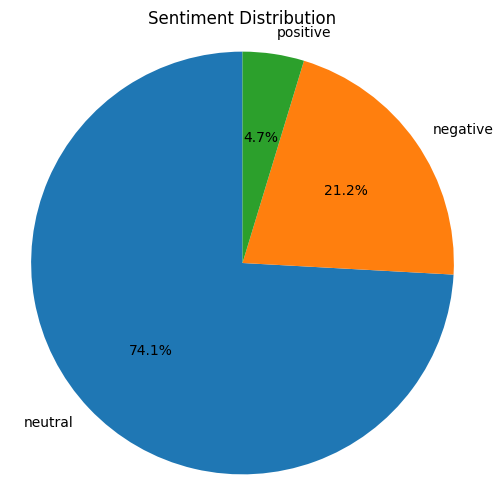

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' contains the sentiment column with 'positive', 'negative', and 'neutral' values
sentiment_counts = df['Review sentiment'].value_counts()

labels = sentiment_counts.index
sizes = sentiment_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Sentiment Distribution')
plt.show()


In [ ]:
df.describe().T


,count,unique,top,freq
Bank,9264,13,TD,3048
Subreddit_name,9264,12,PersonalFinanceCanada,2958
Title,9264,1914,Bank jobs in Canada TD Canada BMO RBC Scotiaba...,30
Bpvotes,9264,615,0,2429
Selftext,9210,1902,Hey folks\n\nSo I started my landscaping busin...,30
Comments Count,9234,260,2,576
Created,9234,1914,2024-01-22 17:30:24,30
Review sentiment,9264,3,neutral,6867


# Doing analysis on AppFollow dataset


In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/IP2_Project/labeled_data.xlsx', engine='openpyxl')
main_df = pd.DataFrame()
display(df)

,Submission date,AppID,AppName,Review Language,Rating,Title,Review,Reply Date,Reply Delta,Developer Reply,Tokens,Review sentiment
0,2016-09-25,com.bmo.mobile,bmo_GooglePlay,en,2,Lacklustre and Underwhelming,come on bmo get mobile deposit already its bee...,NaN,NaN,NaN,"['come', 'bmo', 'mobile', 'deposit', 'availabl...",neutral
1,2016-09-22,com.bmo.mobile,bmo_GooglePlay,en,5,NaN,compact and light on resources,NaN,NaN,NaN,"['compact', 'light', 'resource']",neutral
2,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,1,Used to be great...,this app used to be amazing but once it did th...,NaN,NaN,NaN,"['app', 'amazing', 'new', 'update', 'take', 'f...",negative
3,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,4,Needs SMS & Cheque depositing,its a great app especially now that it doesnt ...,NaN,NaN,NaN,"['great', 'app', 'especially', 'not', '30', 'm...",positive
4,2016-09-21,com.bmo.mobile,bmo_GooglePlay,en,3,NaN,having problems opening this app now why,NaN,NaN,NaN,"['have', 'problem', 'open', 'app']",negative
...,...,...,...,...,...,...,...,...,...,...,...,...
107956,2016-09-24,358790776,td_AppStore,en,1,Doesn't work,it kept showing me system error cant log in ac...,NaN,NaN,NaN,"['keep', 'show', 'system', 'error', 'not', 'lo...",negative
107957,2016-09-24,358790776,td_AppStore,en,1,Doesn't work,system error every time i try to log in cant e...,NaN,NaN,NaN,"['system', 'error', 'time', 'try', 'log', 'not...",negative
107958,2016-09-24,358790776,td_AppStore,en,5,Great,app is good until td touch comes out you can a...,NaN,NaN,NaN,"['app', 'good', 'td', 'touch', 'come', 'add', ...",positive
107959,2016-09-24,358790776,td_AppStore,en,1,Crashes with e transfers,brutal trying to do an etransfer to collect mo...,NaN,NaN,NaN,"['brutal', 'try', 'etransfer', 'collect', 'mon...",negative


In [ ]:
# Filter the DataFrame for rows where rating >= 3 and sentiment is negative
filtered_rows = df[(df['Rating'] >= 4) & (df['Review sentiment'] == 'negative')]

# Get the index (row numbers) of the first 100 such rows
row_numbers = filtered_rows.index[:100].tolist()

print(row_numbers)
print(len(filtered_rows))


[7, 22, 63, 88, 103, 105, 116, 257, 292, 348, 373, 402, 423, 447, 506, 522, 547, 563, 604, 640, 642, 644, 698, 751, 760, 762, 789, 808, 809, 836, 838, 866, 888, 904, 945, 947, 962, 1040, 1076, 1158, 1225, 1361, 1430, 1434, 1435, 1501, 1515, 1572, 1626, 1643, 1706, 1711, 1736, 1764, 1821, 1882, 1940, 2003, 2068, 2074, 2132, 2170, 2179, 2206, 2240, 2291, 2314, 2355, 2424, 2536, 2537, 2544, 2554, 2564, 2574, 2578, 2686, 2779, 2787, 2788, 2793, 2798, 2823, 2888, 2926, 2995, 3024, 3031, 3037, 3040, 3047, 3048, 3085, 3097, 3157, 3178, 3204, 3224, 3241, 3249]
3373


In [ ]:

# List of target words/phrases
target_words = ['mobile app', 'app','user friendly', 'ui', 'online banking', 'mobile payments', 'mobile', 'interact']

# Filter reviews that contain any of the target words
filtered_reviews = df[df['Review'].apply(lambda review: any(word in str(review) for word in target_words))]

# Get the count of matching reviews
count = filtered_reviews.shape[0]

# Get the row numbers (index)
row_numbers = filtered_reviews.index.tolist()

print(f"Count of matching reviews: {count}")
print(f"Row numbers of matching reviews: {row_numbers}")


Count of matching reviews: 53349
Row numbers of matching reviews: [0, 2, 3, 4, 7, 8, 12, 15, 16, 19, 25, 26, 29, 31, 33, 34, 38, 39, 41, 44, 45, 46, 47, 48, 50, 51, 52, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 77, 79, 80, 83, 85, 86, 90, 91, 93, 94, 98, 99, 100, 102, 105, 108, 109, 111, 112, 113, 114, 115, 117, 121, 122, 125, 128, 129, 130, 133, 134, 135, 137, 138, 139, 140, 144, 145, 147, 149, 151, 153, 154, 156, 157, 160, 161, 163, 164, 171, 172, 173, 175, 176, 177, 180, 183, 184, 185, 187, 188, 193, 196, 198, 199, 200, 204, 206, 207, 211, 212, 214, 216, 222, 225, 227, 230, 231, 236, 240, 242, 244, 247, 248, 249, 251, 255, 256, 257, 259, 262, 263, 264, 270, 271, 273, 275, 279, 281, 283, 284, 285, 286, 287, 288, 289, 291, 292, 294, 296, 297, 298, 299, 300, 302, 303, 304, 309, 311, 313, 314, 317, 319, 320, 321, 322, 326, 327, 331, 332, 336, 337, 340, 348, 351, 355, 356, 359, 360, 361, 362, 363, 365, 367, 370, 373, 374, 375, 376, 377, 383, 386, 388, 389, 391, 392, 396

In [ ]:
from collections import Counter


bank_services_features = [
    # Customer Service
    'Customer Service', 'Response Time', 'Wait Time', '24/7 Support', 'Staff Interaction',
    'Friendly Staff', 'Professionalism', 'Knowledgeable', 'Service Quality', 'Inefficient',
    'Attentive', 'Unresponsive', 'Problem Solving', 'Complaint Handling', 'Dispute Resolution',
    'Additional Features', 'Personalized Service', 'Multilingual Support', 'Empathy',
    'Feedback and Satisfaction', 'Customer Feedback', 'Satisfaction Level',
    'Operational Aspects', 'Queue Times', 'Service Desk', 'Client Care',

    # Fees and Charges
    'Fee Types', 'Fee', 'No Fee', 'Low Fee', 'Hidden Charges', 'Annual Fee', 'Overdraft Fee',
    'Late Payment Fee', 'Specific Fees', 'Service Charge', 'Account Maintenance Fee',
    'Transaction Fee', 'Minimum Balance Fee', 'ATM Fee', 'Penalty Charges',
    'International and Miscellaneous', 'International Fees', 'Excessive Fees',
    'Financial Policies', 'Fee Structure', 'Cost-Effective', 'Fee Waiver',
    'Transparency', 'Billing Accuracy', 'Refund Policy',

    # Mobile and Online Banking
    'Mobile and Online Banking', 'Interac', 'Mobile banking', 'Online banking', 'Performance', 'App Performance', 'Website Downtime',
    'App Crash', 'Tech Glitches', 'Update Frequency', 'Usability', 'User-Friendly', '2 factor authentication', 'two factor authentication'
    'Navigation Ease', 'Digital Account Management', 'Online Transactions',
    'Platform Stability', 'Features', 'Digital Features', 'Online Security',
    'Mobile Deposit', 'E-banking', 'Mobile Payments', 'Support and Stability',
    'Connectivity Issues', 'Remote Banking', 'App Ratings', 'Software Bugs', 'Online Support',

    # Loan and Mortgage Services
    'Loan and Mortgage Services', 'Loan', 'Rates', 'Mortgage', 'Insurance', 'Process and Terms', 'Application Process',
    'Approval Rate', 'Loan Terms', 'Mortgage Broker', 'Loan Products', 'Financial Guidance',
    'Financial Advice', 'Interest Options', 'Payment Flexibility', 'Debt Consolidation',
    'Contractual Aspects', 'Credit Score Impact', 'Equity Release', 'Loan Modification',
    'Foreclosure', 'Prepayment Options', 'Efficiency and Management', 'Lending Criteria',
    'Mortgage Consultant', 'Refinancing Rates', 'Loan Management', 'Funding Speed',
    'Repayment Terms',

    # Security
    'Security', 'Threat Management', 'Security Breach', 'Fraud Alert', 'Data Breach',
    'Phishing Protection', 'Fraud Prevention', 'Protocols and Standards', 'Encryption Standards',
    'Secure Login', 'Security Protocol', 'Biometric Security', 'Secure Encryption',
    'Security Updates', 'Monitoring and Compliance', 'Security Audit', 'Account Monitoring',
    'Secure Socket Layer (SSL)', 'Privacy Practices', 'Account Locks', 'Security Advisory',
    'Risk Management', 'Security Patch',

    # Interest Rates
    'Interest Rates', 'Rate Types and Adjustments', 'Rate Adjustment', 'Fixed Interest',
    'Variable Interest', 'Rate Lock', 'Base Rate', 'Rate Increase', 'Rate Reduction',
    'Calculations and Offers', 'Interest Calculation', 'Annual Percentage Rate (APR)', 'Yield',
    'Discount Rate', 'Prime Rate', 'Low-interest Offer', 'Policy and Transparency',
    'Rate Comparison', 'Rate Guarantee', 'Financial Market Rates', 'Interest Policy',
    'Rate Transparency', 'Rate Negotiation',

    # Speed and Efficiency
    'Speed and Efficiency', 'Speed Aspects', 'Fast Service', 'Quick Processing',
    'Time-Saving', 'Immediate Response', 'Fast Transaction', 'Real-time Processing',
    'Swift Action', 'Rapid Approval', 'Quick Turnaround', 'Efficiency Metrics', 'Efficiency',
    'Expedited Service', 'Speed of Service', 'Operational Efficiency', 'Time Efficiency',
    'Speed Optimization', 'Prompt Service', 'Streamlined Process', 'Quick Access',
    'Speedy Resolution', 'Fast Customer Care',

    # Rewards and Benefits
    'Rewards and Benefits', 'Rewards', 'Points', 'Credit', 'Debit', 'Rewards Types', 'Reward Points', 'Cash Rewards', 'Bonus Points',
    'Loyalty Points', 'Travel Rewards', 'Program Features', 'Membership Perks',
    'Loyalty Program', 'Sign-up Bonus', 'Reward Redemption', 'Rewards Balance',
    'Offers and Incentives', 'Exclusive Offers', 'Credit Card Benefits', 'Special Discounts',
    'Member Benefits', 'Cash-back Offer', 'Reward Tiers', 'Reward Exclusivity',
    'Benefit Eligibility', 'Accumulated Points', 'Points System'
]

# Function to count occurrences of each keyword in a review
def count_keywords(review):
    keyword_count = Counter()
    review = str(review).lower()
    for keyword in bank_services_features:
        keyword_lower = keyword.lower()
        if keyword_lower in review:
            keyword_count[keyword] += review.count(keyword_lower)
    return keyword_count

# Apply the function to all reviews and sum up the counts
total_keyword_count = sum(df['Review'].apply(count_keywords), Counter())

# Convert the Counter object to a DataFrame for easier sorting and display
keyword_count_df = pd.DataFrame(total_keyword_count.items(), columns=['Keyword', 'Frequency'])

# Sort the keywords by frequency in descending order
keyword_count_df = keyword_count_df.sort_values(by='Frequency', ascending=False)

# Display the top 100 keywords
top_100_keywords = keyword_count_df.head(100)

# Show the result
top_100_keywords

,Keyword,Frequency
9,Credit,3328
10,Features,2165
1,Fee,1832
5,Security,1700
11,Online banking,1305
...,...,...
64,Rate Increase,1
51,Tech Glitches,1
53,Exclusive Offers,1
61,Foreclosure,1


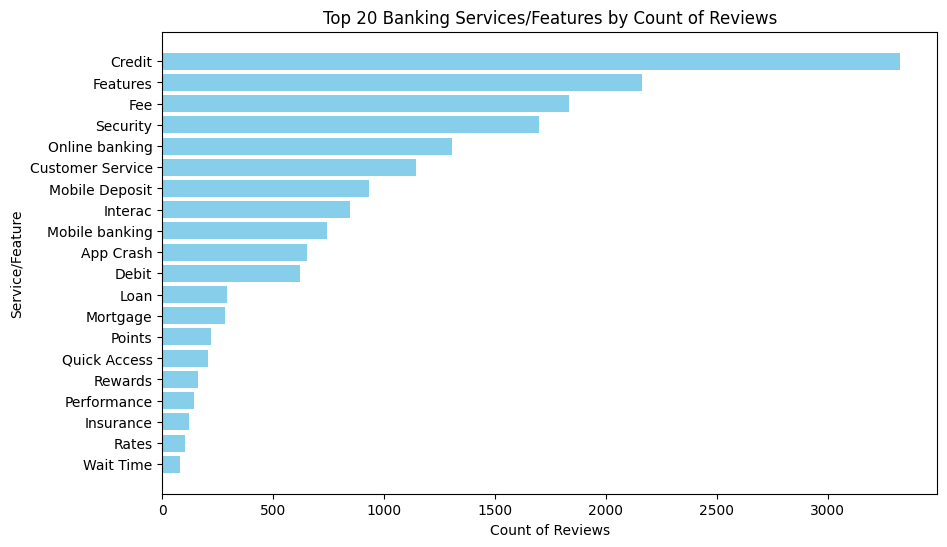

In [ ]:
import matplotlib.pyplot as plt


top_20_keywords = keyword_count_df.head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_20_keywords['Keyword'], top_20_keywords['Frequency'], color='skyblue')
plt.xlabel('Count of Reviews')
plt.ylabel('Service/Feature')
plt.title('Top 20 Banking Services/Features by Count of Reviews')
plt.gca().invert_yaxis()  # To display the highest count at the top
plt.show()


In [ ]:
top_20_services = keyword_count_df['Keyword'].head(20).tolist()
print(top_20_services)

['Credit', 'Features', 'Fee', 'Security', 'Online banking', 'Customer Service', 'Mobile Deposit', 'Interac', 'Mobile banking', 'App Crash', 'Debit', 'Loan', 'Mortgage', 'Points', 'Quick Access', 'Rewards', 'Performance', 'Insurance', 'Rates', 'Wait Time']


In [ ]:
def analyze_service_sentiment(df, bank_name, service_name):
    # Initialize variables
    sentiment_counter = 0
    positive_reviews = []
    negative_reviews = []
    keywords_to_avoid = ['app', 'interface', 'ui', 'layout', 'design', 'update', 'fingertips', 'bug', 'fingerprint', 'version']

    # Filter reviews by the given bank name and check for the service name in the review
    bank_reviews = df[df['AppName'].str.split('_').str[0] == bank_name]

    for _, row in bank_reviews.iterrows():
        review = row['Review']
        review = str(review).lower()

        if service_name.lower() in review:
            sentiment = row['Review sentiment']

            # Increment or decrement sentiment_counter based on the sentiment
            if sentiment == 'positive' and all(keyword not in review for keyword in keywords_to_avoid):
                sentiment_counter += 1
                if len(positive_reviews) < 5:  # Record max 5 positive reviews
                    positive_reviews.append(review)
            elif sentiment == 'negative' and all(keyword not in review for keyword in keywords_to_avoid):
                sentiment_counter -= 1
                if len(negative_reviews) < 5:
                    negative_reviews.append(review)

    return sentiment_counter, positive_reviews, negative_reviews

sentiment_counter, positive_reviews, negative_reviews = analyze_service_sentiment(df, 'scotia', 'loan')

print(f"Sentiment Counter: {sentiment_counter}")
print("Positive Reviews:")
for review in positive_reviews:
    print(review)
    print("")
print("\nNegative Reviews:")
for review in negative_reviews:
    print(review)
    print("")

Sentiment Counter: -1
Positive Reviews:
was so much better was able to make prepmts to my mortgage and vehicle loan now i cant do that 

i love scotiabank except for the fact that as a loyal customer with a cosigner i cannot get a loan and they are aware that i have collateral and i am trying to get my life back on track after 12 years of brain cancer and i just payed off a 14000 loan a year early for my car this i dont understand but i am loyal

awesome love the bank for home loan safety of transactions service etc

best bank from my newcomer period on 2010 till now great loan offers to back up my family needs i always mention these to my friendsfamily and coworkers keep rocking


Negative Reviews:
i can not track payment history and only i can get last payment detail when i financed from honda i could check each and every detail for the payment details biweekly and can check my additional payments made have been considered or not here with scotia bank if i make an additional payment 

In [ ]:
import pandas as pd
from collections import Counter

def record_token_frequency(df):
    # Initialize an empty Counter to store the frequency of words
    token_counter = Counter()

    # Iterate through each row in the 'Tokens' column
    for token_list in df['Tokens']:
        # Split the string by comma and strip any extra spaces
        tokens = [token.strip() for token in token_list.split(',')]
        # Update the counter with tokens
        token_counter.update(tokens)

    # Convert the counter to a DataFrame for better readability
    token_frequency_df = pd.DataFrame(token_counter.items(), columns=['Token', 'Frequency'])

    # Sort by frequency in descending order
    token_frequency_df = token_frequency_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

    return token_frequency_df

# Example usage
token_frequency_df = record_token_frequency(df)

# Display the top 10 most frequent tokens
print(token_frequency_df.head(1000))


        Token  Frequency
0       'app'      45615
1       'not'      17583
2      'work'      13650
3        '  '      12234
4      'time'      11538
..        ...        ...
995     'eye'        143
996  'right']        143
997   ['poor'        143
998  'modern'        142
999  'poorly'        142

[1000 rows x 2 columns]
